In [1]:
#IMPLEMENTATION OF FORECASTING AND CLASSIFICATION MODELS TO PREDICT CRIMES IN CHICAGO

In [2]:
#load the libraries
import datetime
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#load the files into dataframe

In [4]:
#pd_df_main_2015.shape

In [5]:
pd_df_main_2015 = pd.read_csv("D:\\DataSets\\crime_full_data_2015.csv")

In [6]:
pd_df_main_2015.shape

(263798, 19)

In [7]:
pd_df_main_2016 = pd.read_csv("D:\\DataSets\\crime_full_data_2016.csv")

In [8]:
pd_df_main_2016.shape

(268631, 19)

In [9]:
pd_df_main_2017 = pd.read_csv("D:\\DataSets\\crime_full_data_2017.csv")

In [10]:
pd_df_main_2017.shape

(267440, 19)

In [11]:
pd_df_main_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263798 entries, 0 to 263797
Data columns (total 19 columns):
Unnamed: 0              263798 non-null int64
Case Number             263798 non-null object
Date                    263798 non-null object
Block                   263798 non-null object
IUCR                    263798 non-null object
Primary Type            263798 non-null object
Description             263798 non-null object
Location Description    263451 non-null object
Arrest                  263798 non-null bool
Domestic                263798 non-null bool
Beat                    263798 non-null int64
Ward                    263796 non-null float64
FBI Code                263798 non-null object
X Coordinate            257890 non-null float64
Y Coordinate            257890 non-null float64
Year                    263798 non-null int64
Latitude                257890 non-null float64
Longitude               257890 non-null float64
Location                257890 non-null objec

In [12]:
#convert to date time

In [13]:
#pd_df_main_2015['Date'] = pd.to_datetime(pd_df_main_2015['Date'], format='%m/%d/%Y %I:%M:%S %p')# %I Hour (12-hour clock), local's equivalent of AM/PM
pd_df_main_2015['Date'] = pd.to_datetime(pd_df_main_2015['Date'])

In [14]:
#pd_df_main_2016['Date'] = pd.to_datetime(pd_df_main_2016['Date'], format='%m/%d/%Y %I:%M:%S %p')# %I Hour (12-hour clock), local's equivalent of AM/PM
pd_df_main_2016['Date'] = pd.to_datetime(pd_df_main_2016['Date'])

In [15]:
#pd_df_main_2017['Date'] = pd.to_datetime(pd_df_main_2017['Date'], format='%m/%d/%Y %I:%M:%S %p')# %I Hour (12-hour clock), local's equivalent of AM/PM
pd_df_main_2017['Date'] = pd.to_datetime(pd_df_main_2017['Date'])

In [16]:
pd_df_main_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267440 entries, 0 to 267439
Data columns (total 19 columns):
Unnamed: 0              267440 non-null int64
Case Number             267440 non-null object
Date                    267440 non-null datetime64[ns]
Block                   267440 non-null object
IUCR                    267440 non-null object
Primary Type            267440 non-null object
Description             267440 non-null object
Location Description    266482 non-null object
Arrest                  267440 non-null bool
Domestic                267440 non-null bool
Beat                    267440 non-null int64
Ward                    267439 non-null float64
FBI Code                267440 non-null object
X Coordinate            265020 non-null float64
Y Coordinate            265020 non-null float64
Year                    267440 non-null int64
Latitude                265020 non-null float64
Longitude               265020 non-null float64
Location                265020 non-nu

In [17]:
#check for null records
pd.isnull(pd_df_main_2015).any()
pd.isnull(pd_df_main_2015).sum()

Unnamed: 0              False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
Ward                     True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

Unnamed: 0                 0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     347
Arrest                     0
Domestic                   0
Beat                       0
Ward                       2
FBI Code                   0
X Coordinate            5908
Y Coordinate            5908
Year                       0
Latitude                5908
Longitude               5908
Location                5908
dtype: int64

In [18]:
pd.isnull(pd_df_main_2016).any()
pd.isnull(pd_df_main_2016).sum()

Unnamed: 0              False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
Ward                    False
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

Unnamed: 0                 0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     968
Arrest                     0
Domestic                   0
Beat                       0
Ward                       0
FBI Code                   0
X Coordinate            1401
Y Coordinate            1401
Year                       0
Latitude                1401
Longitude               1401
Location                1401
dtype: int64

In [19]:
pd.isnull(pd_df_main_2017).any()
pd.isnull(pd_df_main_2017).sum()

Unnamed: 0              False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
Ward                     True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

Unnamed: 0                 0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     958
Arrest                     0
Domestic                   0
Beat                       0
Ward                       1
FBI Code                   0
X Coordinate            2420
Y Coordinate            2420
Year                       0
Latitude                2420
Longitude               2420
Location                2420
dtype: int64

In [20]:
#remove null records for Ward column for 2015 and 2017 dfs

In [21]:
pd_df_main_2015=pd_df_main_2015.dropna(subset=['Ward'])
pd_df_main_2017=pd_df_main_2017.dropna(subset=['Ward'])

In [22]:
#check for null records again
pd.isnull(pd_df_main_2015).any()
pd.isnull(pd_df_main_2017).any()

Unnamed: 0              False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
Ward                    False
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

Unnamed: 0              False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
Ward                    False
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

In [23]:
#convert Ward from float to int
pd_df_main_2015['Ward']=pd_df_main_2015['Ward'].astype(int)
pd_df_main_2016['Ward']=pd_df_main_2016['Ward'].astype(int)
pd_df_main_2017['Ward']=pd_df_main_2017['Ward'].astype(int)

In [24]:
pd_df_main_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263796 entries, 0 to 263797
Data columns (total 19 columns):
Unnamed: 0              263796 non-null int64
Case Number             263796 non-null object
Date                    263796 non-null datetime64[ns]
Block                   263796 non-null object
IUCR                    263796 non-null object
Primary Type            263796 non-null object
Description             263796 non-null object
Location Description    263449 non-null object
Arrest                  263796 non-null bool
Domestic                263796 non-null bool
Beat                    263796 non-null int64
Ward                    263796 non-null int32
FBI Code                263796 non-null object
X Coordinate            257888 non-null float64
Y Coordinate            257888 non-null float64
Year                    263796 non-null int64
Latitude                257888 non-null float64
Longitude               257888 non-null float64
Location                257888 non-null

In [25]:
#create the merged dataframe

In [26]:
pd_df_main = pd.concat([pd_df_main_2015,pd_df_main_2016, pd_df_main_2017],axis = 0)

In [27]:
pd_df_main.shape

(799866, 19)

In [28]:
crimes = pd_df_main.copy(deep=True)
crimes_2015 = pd_df_main_2015.copy(deep=True)
crimes_2016 = pd_df_main_2016.copy(deep=True)
crimes_2017 = pd_df_main_2017.copy(deep=True)

In [29]:
#add a new column Month

In [31]:
import calendar

In [32]:
#Add month

In [33]:
crimes['Month'] = (crimes['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
crimes_2015['Month'] = (crimes_2015['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
crimes_2016['Month'] = (crimes_2016['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
crimes_2017['Month'] = (crimes_2017['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])

In [34]:
crimes.head(2)
crimes_2015.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,28,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,15,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar


,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,28,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,15,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar


In [35]:
#add WeekNo

In [36]:
crimes["WeekNo"] = crimes['Date'].dt.week
crimes_2015["WeekNo"] = crimes_2015['Date'].dt.week
crimes_2016["WeekNo"] = crimes_2016['Date'].dt.week
crimes_2017["WeekNo"] = crimes_2017['Date'].dt.week

In [37]:
crimes.head(2)
crimes_2015.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12


,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12


In [38]:
#add weekday

In [39]:
crimes["Weekday"] = crimes['Date'].dt.weekday_name
crimes_2015["Weekday"] = crimes_2015['Date'].dt.weekday_name
crimes_2016["Weekday"] = crimes_2016['Date'].dt.weekday_name
crimes_2017["Weekday"] = crimes_2017['Date'].dt.weekday_name

In [40]:
crimes.head(2)
crimes_2015.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12,Wednesday


,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,04B,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,26,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12,Wednesday


In [41]:
#Add Quarter
crimes["Quarter"] = crimes['Date'].dt.quarter
crimes_2015["Quarter"] = crimes_2015['Date'].dt.quarter
crimes_2016["Quarter"] = crimes_2016['Date'].dt.quarter
crimes_2017["Quarter"] = crimes_2017['Date'].dt.quarter

In [42]:
crimes.head(2)
crimes_2015.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12,Wednesday,1


,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12,Wednesday,1


In [329]:
crimes.to_csv("D:\\Datasets\\CrimeProject\\crimes.csv")

### No of crimes reported each year

In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
current_palette = matplotlib.colors.hex2color('#A9A9A9')

In [45]:
#reference for grid is http://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/

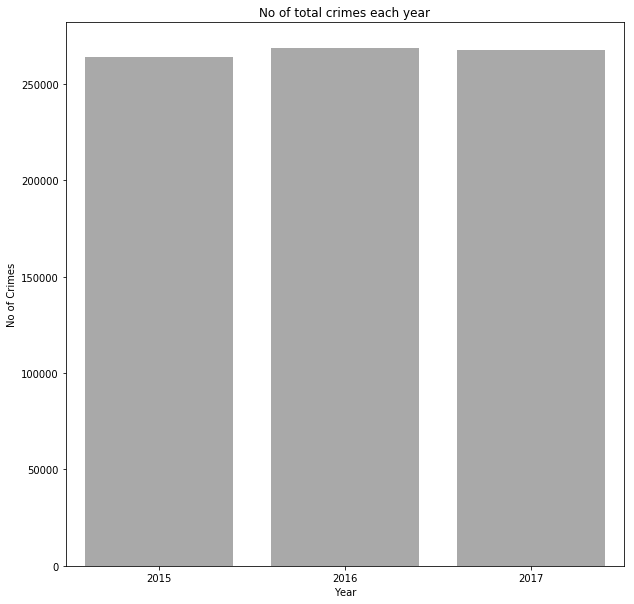

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x='Year',data = crimes, color=current_palette)
plt.ylabel('No of Crimes')
plt.title("No of total crimes each year")
plt.show();

In [47]:
#There is little change in the overal no of crimes in 2015,2016 and 2017

### Analyze Quarterly trend in crimes

In [48]:
import numpy as np

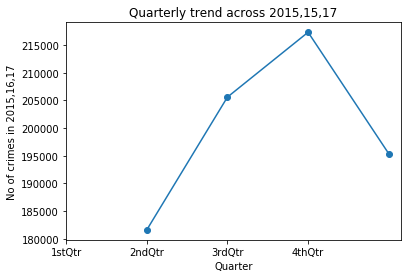

In [49]:
#Quarterly trend across 2015,15,17
Quarter = ['1stQtr','2ndQtr','3rdQtr','4thQtr']
crimes.groupby(['Quarter'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(4), Quarter)
plt.ylabel('No of crimes in 2015,16,17')
plt.title("Quarterly trend across 2015,15,17")
plt.show();

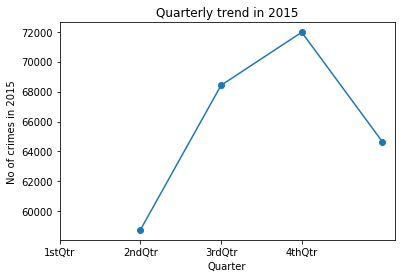

In [50]:
#Quarterly trend in 2015
Quarter = ['1stQtr','2ndQtr','3rdQtr','4thQtr']
crimes_2015.groupby(['Quarter'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(4), Quarter)
plt.ylabel('No of crimes in 2015')
plt.title('Quarterly trend in 2015')
plt.show();

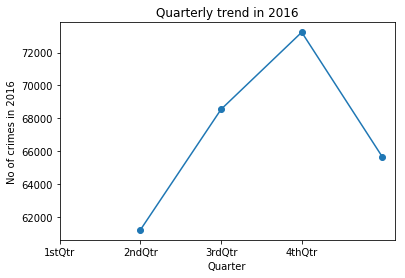

In [51]:
#Quarterly trend in 2016
Quarter = ['1stQtr','2ndQtr','3rdQtr','4thQtr']
crimes_2016.groupby(['Quarter'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(4), Quarter)
plt.ylabel('No of crimes in 2016')
plt.title('Quarterly trend in 2016')
plt.show();

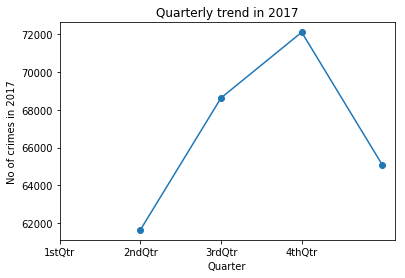

In [52]:
#Quarterly trend in 2017
Quarter = ['1stQtr','2ndQtr','3rdQtr','4thQtr']
crimes_2017.groupby(['Quarter'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(4), Quarter)
plt.ylabel('No of crimes in 2017')
plt.title('Quarterly trend in 2017')
plt.show();

In [53]:
#Above Plot shows that there is no of crimes increases between 3rd and 4th quarters

### Analyze Monthly trend in crimes

In [54]:
import numpy as np

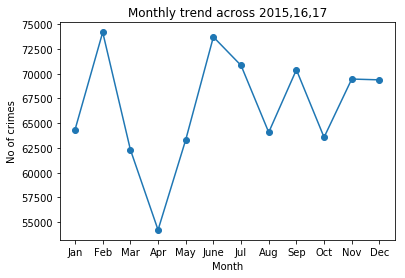

In [55]:
#Monthly trend across 2015,16,17
months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
crimes.groupby(['Month'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(12), months)
plt.ylabel('No of crimes')
plt.title('Monthly trend across 2015,16,17')
plt.show();

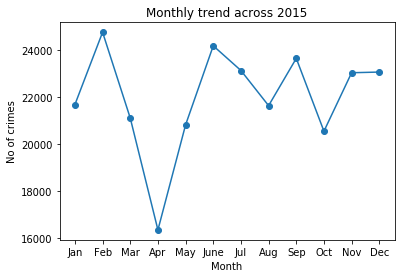

In [59]:
#Monthly trend across 2015
months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_2015.groupby(['Month'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(12), months)
plt.ylabel('No of crimes')
plt.title('Monthly trend across 2015')
plt.show();

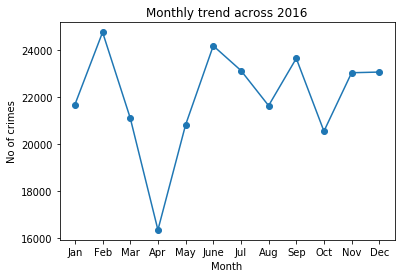

In [60]:
#Monthly trend across 2016
months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_2015.groupby(['Month'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(12), months)
plt.ylabel('No of crimes')
plt.title('Monthly trend across 2016')
plt.show();

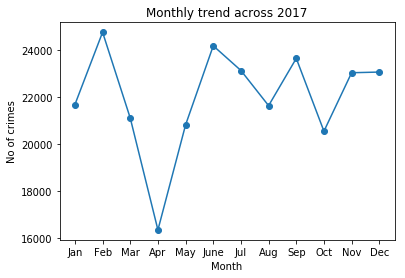

In [61]:
#Monthly trend across 2017
months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_2015.groupby(['Month'])['Case Number'].count().plot(marker='o')
plt.xticks(np.arange(12), months)
plt.ylabel('No of crimes')
plt.title('Monthly trend across 2017')
plt.show();

In [62]:
#Above plot shows that Crime decreases in April and it is high in Feb, June, July

### Weekday Trend

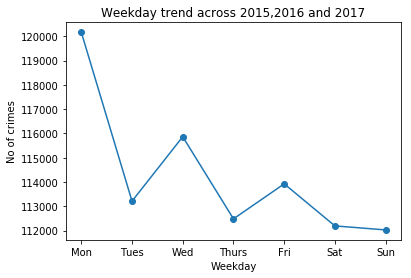

In [61]:
#Weekday trend across 2015,2016 and 2017
Weekday = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
crimes.groupby('Weekday')['Case Number'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),Weekday)
plt.ylabel("No of crimes")
plt.title('Weekday trend across 2015,2016 and 2017')
plt.show();

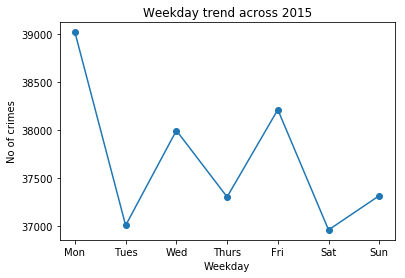

In [63]:
#Weekday trend in 2015
Weekday = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
crimes_2015.groupby('Weekday')['Case Number'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),Weekday)
plt.ylabel("No of crimes")
plt.title('Weekday trend across 2015')
plt.show();

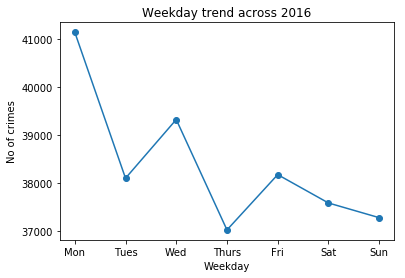

In [64]:
#Weekday trend in 2016
Weekday = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
crimes_2016.groupby('Weekday')['Case Number'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),Weekday)
plt.ylabel("No of crimes")
plt.title('Weekday trend across 2016')
plt.show();

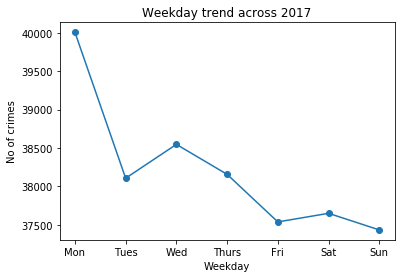

In [65]:
#Weekday trend in 2017
Weekday = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
crimes_2017.groupby('Weekday')['Case Number'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),Weekday)
plt.ylabel("No of crimes")
plt.title('Weekday trend across 2017')
plt.show();

In [66]:
#it is lowest during weekend and highest on Monday

### Types of crimes and their counts

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
current_palette = matplotlib.colors.hex2color('#A9A9A9')

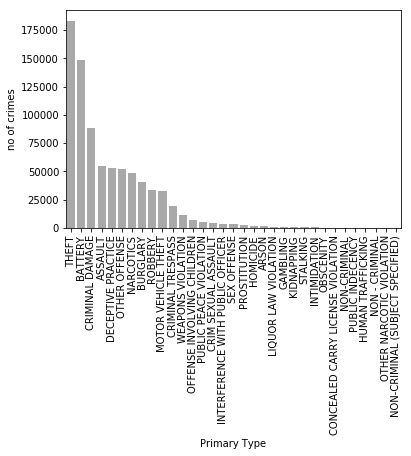

In [68]:
#current_palette = sns.color_palette()
sns.countplot(x='Primary Type', data = crimes, order = crimes['Primary Type'].value_counts().index, color=current_palette)
plt.xticks(rotation = 'vertical')
plt.ylabel("no of crimes")
plt.show();

In [69]:
#top 5 crimes are 'THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','DECEPTIVE PRACTICE'

### TOP 10 locations of crime

In [70]:
top_10_locations = crimes.groupby('Location Description')['Case Number'].count().sort_values(ascending = False)
top_10_locations = top_10_locations[:10]
top_10_locations

Location Description
STREET                            181681
RESIDENCE                         132812
APARTMENT                         102456
SIDEWALK                           72359
OTHER                              33127
PARKING LOT/GARAGE(NON.RESID.)     23836
SMALL RETAIL STORE                 18183
RESTAURANT                         17563
RESIDENTIAL YARD (FRONT/BACK)      16390
ALLEY                              16190
Name: Case Number, dtype: int64

Text(0,0.5,'No of crimes')

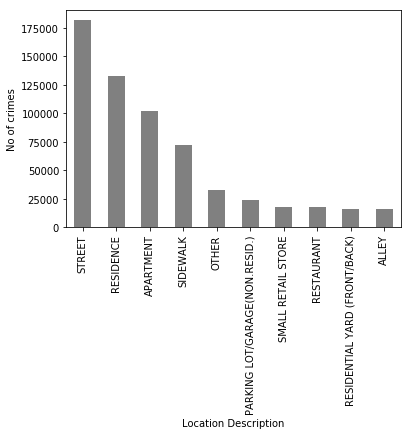

In [71]:
top_10_locations.plot(kind='bar', color = 'grey')
plt.ylabel('No of crimes')
plt.show()

### Arrest Stats

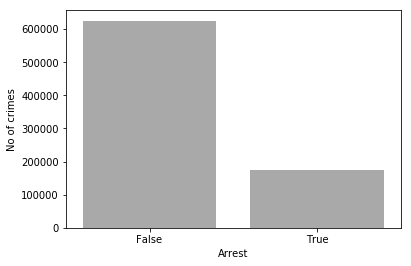

In [72]:
sns.countplot(x='Arrest', data=crimes, color=current_palette)
plt.ylabel("No of crimes")
plt.show();

In [73]:
#no of arrests is less

### Year-wise arrest

Text(0,0.5,'No of crimes')

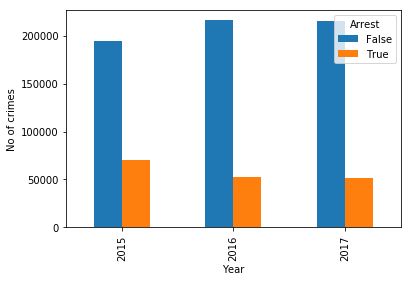

In [74]:
crimes.groupby(['Year','Arrest'])['Case Number'].count().unstack().plot(kind='bar')
plt.ylabel('No of crimes')
plt.show()

In [76]:
#No of arrest is less in all the years. Arrest no increases in 2017.

### Crime vs Arrest monthwise

In [77]:
arrest = crimes[crimes['Arrest']==True]

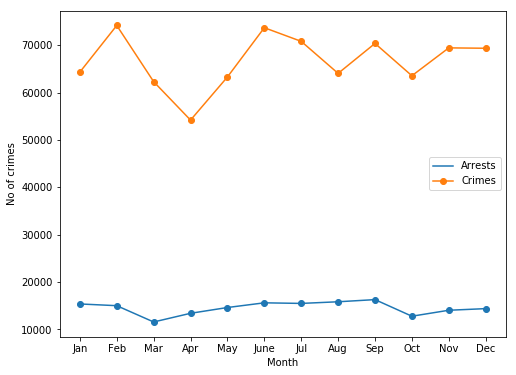

In [78]:
arrest.groupby('Month')['Case Number'].count().plot(legend=True, label='Arrests', marker ='o',figsize=(8,6))
crimes.groupby('Month')['Case Number'].count().plot(legend=True, label='Crimes', marker ='o')
plt.ylabel('No of crimes')
plt.xticks(np.arange(12),months)
plt.show();

In [79]:
#the no of arrests made is less than no of crimes committed. In April, 
#no of crimes is less compared to other months. However, no of arrests remain high.

### Analyze top 5 crimes

In [80]:
#top 5 crimes are 'THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','DECEPTIVE PRACTICE'

In [81]:
top_5_crimes = crimes[(crimes['Primary Type']=='THEFT')
                            |(crimes['Primary Type']=='BATTERY')
                            |(crimes['Primary Type']=='CRIMINAL DAMAGE')
                            |(crimes['Primary Type']=='ASSAULT')
                            |(crimes['Primary Type']=='DECEPTIVE PRACTICE')]

In [82]:
top_5_crimes.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1
2,2,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1185075.0,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1
3,3,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,1178033.0,1870804.0,2015,41.800802,-87.622619,"(41.800802415, -87.622619343)",Mar,12,Wednesday,1
5,5,HY190032,2015-03-18 22:00:00,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,1183018.0,1872537.0,2015,41.805443,-87.604284,"(41.805443345, -87.604283976)",Mar,12,Wednesday,1
6,6,HY190047,2015-03-18 23:00:00,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1170859.0,1858210.0,2015,41.766403,-87.649296,"(41.766402779, -87.649296123)",Mar,12,Wednesday,1


In [83]:
#Weekly Pivot

In [85]:
weekly_count = top_5_crimes.pivot_table(values = 'Case Number', index='WeekNo',columns = 'Year', aggfunc=np.size)
weekly_count.head()

Year,2015,2016,2017
WeekNo,,,
1,1770.0,2967.0,2761.0
2,2226.0,2806.0,3037.0
3,2844.0,2895.0,3302.0
4,3163.0,3197.0,3290.0
5,2745.0,3087.0,3171.0


In [86]:
type(weekly_count)

pandas.core.frame.DataFrame

In [87]:
weekly_count.info()
weekly_count.head(2)
weekly_count.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 3 columns):
2015    53 non-null float64
2016    53 non-null float64
2017    52 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB


Year,2015,2016,2017
WeekNo,,,
1,1770.0,2967.0,2761.0
2,2226.0,2806.0,3037.0


Int64Index([2015, 2016, 2017], dtype='int64', name='Year')

### Monthly trend of top 5 crimes - Yearwise

In [88]:
monthly_trend = top_5_crimes.pivot_table(values = 'Case Number', index='Month',columns = 'Year', aggfunc=np.size)

In [89]:
monthly_trend

Year,2015,2016,2017
Month,,,
Apr,13959,14039,14474
Aug,15874,16976,16870
Dec,13805,13375,14209
Feb,10003,12311,12597
Jan,12366,13346,14007
Jul,15735,16695,16918
Jun,14915,16318,16396
Mar,13488,14652,13657
May,15379,15704,15773


In [90]:
#sns.heatmap(monthly_trend)
#plt.show()

([<matplotlib.axis.XTick at 0x1e1bbe15ac8>,
 <a list of 12 Text xticklabel objects>)

Text(0,0.5,'No of crimes')

Text(0.5,1,'Monthly trend of top 5 crimes - Yearwise')

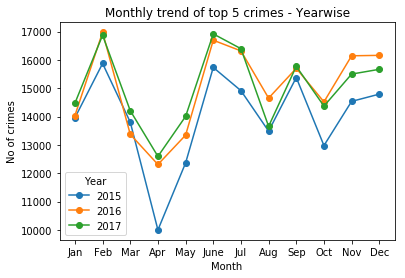

In [91]:
top_5_crimes.groupby(['Month','Year'])['Case Number'].count().unstack().plot(marker = 'o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of crimes')
plt.title('Monthly trend of top 5 crimes - Yearwise')
plt.show()

In [92]:
#Drop is crimes in April was highest in 2015

### Hourly trend of top 5 crimes

In [93]:
hourly_trend = top_5_crimes.pivot_table(values = 'Case Number', index='Primary Type',columns = top_5_crimes['Date'].dt.hour, aggfunc=np.size)
hourly_trend

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Primary Type,,,,,,,,,,,,,,,,,,,,,
ASSAULT,1666,1292,1074,888,633,589,744,1324,2085,2470,...,3269,3845,3552,3378,3260,2973,2845,2691,2401,2143
BATTERY,7165,6759,6174,4984,3724,2687,2472,3257,4484,5089,...,6502,7697,7754,7488,7583,7655,7901,8051,8274,7716
CRIMINAL DAMAGE,4800,3522,3102,2709,2185,1856,2026,2498,3061,3186,...,3309,3688,4043,4625,5268,5014,5361,5468,5787,4673
DECEPTIVE PRACTICE,5049,679,533,483,362,317,438,872,2664,6668,...,3056,3264,2637,2364,2161,1716,1421,994,786,675
THEFT,6527,4177,3478,2874,2260,2133,2944,4225,6319,8046,...,11518,11858,11486,11891,12099,10482,9393,8042,7667,6091


([<matplotlib.axis.XTick at 0x1e1bca92f60>,
 <a list of 24 Text xticklabel objects>)

Text(0.5,0,'Hours of the day')

Text(0,0.5,'No of crimes')

Text(0.5,1,'Hourly trend of top 5 crimes')

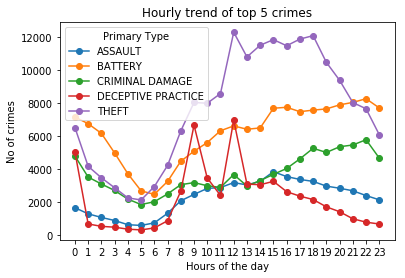

In [94]:
top_5_crimes.groupby([top_5_crimes['Date'].dt.hour,'Primary Type',])['Case Number'].count().unstack().plot(marker = 'o')
plt.xticks(np.arange(24))
plt.xlabel('Hours of the day')
plt.ylabel('No of crimes')
plt.title('Hourly trend of top 5 crimes')
plt.show()

In [95]:
#Above plot shows that trend is high during 11AM and 6 PM

### Monthly trend in top 5 crimes-Crime Type Wise

In [96]:
monthly_trend1 = top_5_crimes.pivot_table(values = 'Case Number', index='Primary Type',columns = 'Month', aggfunc=np.size)
monthly_trend1

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Primary Type,,,,,,,,,,,,
ASSAULT,4542,5096,3881,3618,3820,5124,5263,4561,5315,4124,4721,5010
BATTERY,12246,13632,10789,9820,10829,13966,14077,12270,14166,11095,12543,12978
CRIMINAL DAMAGE,7307,8342,6746,5640,6721,8553,7686,7013,7851,7303,7787,7780
DECEPTIVE PRACTICE,4455,4566,4648,4208,4511,4406,4449,4522,4205,4153,4532,4432
THEFT,13922,18084,15325,11625,13838,17299,16154,13431,15319,15195,16599,16422


In [97]:
#sns.heatmap(monthly_trend1)
#plt.ylabel('No of crimes')
#plt.show()

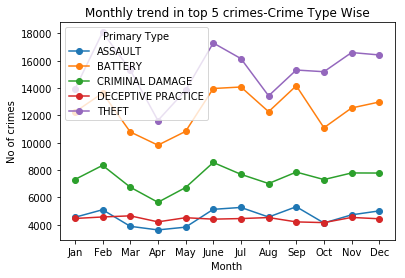

In [106]:
top_5_crimes.groupby(['Month','Primary Type'])['Case Number'].count().unstack().plot(marker = 'o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of crimes')
plt.title('Monthly trend in top 5 crimes-Crime Type Wise')
plt.show();

In [107]:
#Above trend shows that for Assault, Battery and Criminal Damage,  crime is highest in Feb and lowest in April
#For Deceptive Practice, it is almost flat throughout the year

### Weekday trend of top 5 crimes

In [109]:
weekly_trend = top_5_crimes.pivot_table(values = 'Case Number', index='Primary Type',columns = 'Weekday', aggfunc=np.size)
weekly_trend

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Primary Type,,,,,,,
ASSAULT,7852,7970,7457,7590,7950,8140,8116
BATTERY,20531,20408,23587,25547,19665,19440,19233
CRIMINAL DAMAGE,12915,12326,14222,13815,12025,11692,11734
DECEPTIVE PRACTICE,8675,8257,6624,5174,8123,8220,8014
THEFT,28152,26071,26452,23964,26569,25947,26058


([<matplotlib.axis.XTick at 0x1e1bc0973c8>,
 <a list of 7 Text xticklabel objects>)

Text(0,0.5,'No of crimes')

Text(0.5,1,'Weekday trend of top 5 crimes')

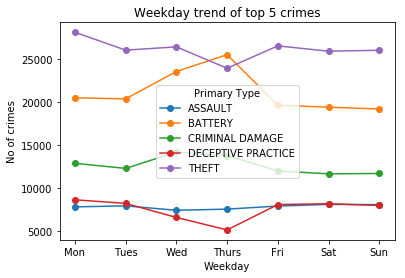

In [110]:
top_5_crimes.groupby(['Weekday','Primary Type'])['Case Number'].count().unstack().plot(marker = 'o')
plt.xticks(np.arange(7),Weekday)
plt.ylabel('No of crimes')
plt.title('Weekday trend of top 5 crimes')
plt.show()

In [111]:
#Deceptive Practice descreases on Thursday
#Assault remains same throughout the week
#Criminal Damage and Battery increases on Thursday
#Theft decreases on Thursday

In [114]:
#Create matrix for top 5 crimes ward-wise

In [115]:
top_5_crimes.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1
2,2,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1185075.0,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1


In [116]:
top_5_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528515 entries, 0 to 267439
Data columns (total 23 columns):
Unnamed: 0              528515 non-null int64
Case Number             528515 non-null object
Date                    528515 non-null datetime64[ns]
Block                   528515 non-null object
IUCR                    528515 non-null object
Primary Type            528515 non-null object
Description             528515 non-null object
Location Description    526245 non-null object
Arrest                  528515 non-null bool
Domestic                528515 non-null bool
Beat                    528515 non-null int64
Ward                    528515 non-null int32
FBI Code                528515 non-null object
X Coordinate            522987 non-null float64
Y Coordinate            522987 non-null float64
Year                    528515 non-null int64
Latitude                522987 non-null float64
Longitude               522987 non-null float64
Location                522987 non-null

In [117]:
#add year_month
top_5_crimes['Year_Month'] = pd.to_datetime(top_5_crimes['Date']).dt.to_period('M')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
top_5_crimes.head(2)

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter,Year_Month
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1,2015-03
2,2,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1,2015-03


In [119]:
#create separate dataframes for each year

In [120]:
top_5_crimes_2015 = top_5_crimes[top_5_crimes['Year']==2015]

In [121]:
top_5_crimes_2015.shape

(167833, 24)

In [122]:
top_5_crimes_2016 = top_5_crimes[top_5_crimes['Year']==2016]

In [123]:
top_5_crimes_2016.shape

(180242, 24)

In [124]:
top_5_crimes_2017 = top_5_crimes[top_5_crimes['Year']==2017]

In [125]:
top_5_crimes_2017.shape

(180440, 24)

In [126]:
#create pivot for monthly crimes ward-wise

In [127]:
ward_monthly_crimes_2015 = top_5_crimes_2015.pivot_table(values = 'Case Number', index='Ward',columns = 'Year_Month', aggfunc=np.size)
ward_monthly_crimes_2015

Year_Month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Ward,,,,,,,,,,,,
1,244,230,262,259,278,278,289,330,352,303,290,316
2,551,438,606,646,653,680,762,706,707,695,566,671
3,314,280,328,394,403,396,417,411,402,425,361,336
4,260,152,260,214,307,274,347,276,324,304,235,259
5,313,220,335,365,355,352,379,382,384,316,301,364
6,392,292,473,484,523,501,489,513,531,447,420,484
7,368,263,334,376,428,394,465,446,355,362,334,317
8,310,300,407,409,437,420,404,417,378,381,340,343
9,315,218,347,377,401,346,408,393,370,295,318,292


In [128]:
ward_monthly_crimes_2016 = top_5_crimes_2016.pivot_table(values = 'Case Number', index='Ward',columns = 'Year_Month', aggfunc=np.size)
ward_monthly_crimes_2016

Year_Month,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
Ward,,,,,,,,,,,,
1,301,253,273,332,363,362,383,344,329,336,331,354
2,609,635,652,613,752,765,822,835,800,702,643,599
3,366,324,382,374,415,444,489,492,449,411,365,326
4,276,213,272,263,277,308,326,337,313,383,330,302
5,269,210,323,335,361,384,364,389,337,385,339,268
6,407,371,491,452,509,500,490,543,453,497,439,389
7,364,332,354,349,421,408,404,433,368,351,364,310
8,366,345,377,360,391,433,452,429,383,465,342,374
9,273,301,361,367,411,400,408,414,412,398,372,280


In [129]:
ward_monthly_crimes_2017 = top_5_crimes_2017.pivot_table(values = 'Case Number', index='Ward',columns = 'Year_Month', aggfunc=np.size)
ward_monthly_crimes_2017

Year_Month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Ward,,,,,,,,,,,,
1,375,324,325,315,296,346,377,361,347,374,300,297
2,642,583,667,672,747,797,809,832,762,728,705,637
3,339,358,365,374,410,446,413,430,381,411,394,335
4,317,257,283,294,308,345,378,315,310,321,301,301
5,328,292,320,299,363,349,422,375,338,327,380,356
6,466,335,429,468,495,499,504,513,479,466,462,459
7,365,304,345,366,371,386,429,412,431,347,342,342
8,364,361,349,399,410,371,402,384,411,391,327,334
9,317,293,342,427,417,424,416,353,384,358,338,333


In [330]:
#save into CSV
ward_monthly_crimes_2015.to_csv('D:\\DataSets\\CrimeProject\\ward_monthly_crimes_2015.csv')
ward_monthly_crimes_2016.to_csv('D:\\DataSets\\CrimeProject\\ward_monthly_crimes_2016.csv')
ward_monthly_crimes_2017.to_csv('D:\\DataSets\\CrimeProject\\ward_monthly_crimes_2017.csv')

In [280]:
#combine the dataframes

In [133]:
ward_monthly_crimes_2015_1 = ward_monthly_crimes_2015.copy(deep = True)
ward_monthly_crimes_2016_1 = ward_monthly_crimes_2016.copy(deep = True)
ward_monthly_crimes_2017_1 = ward_monthly_crimes_2017.copy(deep = True)

In [134]:
#change index Ward to column

In [135]:
ward_monthly_crimes_2015_1.reset_index (level=0, inplace=True)

In [136]:
ward_monthly_crimes_2015_1.head(2)

Year_Month,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,1,244,230,262,259,278,278,289,330,352,303,290,316
1,2,551,438,606,646,653,680,762,706,707,695,566,671


In [137]:
ward_monthly_crimes_2016_1.reset_index (level=0, inplace=True)

In [138]:
ward_monthly_crimes_2017_1.reset_index (level=0, inplace=True)

In [139]:
ward_monthly_crimes_2016_1.head(2)
ward_monthly_crimes_2017_1.head(2)

Year_Month,Ward,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,1,301,253,273,332,363,362,383,344,329,336,331,354
1,2,609,635,652,613,752,765,822,835,800,702,643,599


Year_Month,Ward,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,1,375,324,325,315,296,346,377,361,347,374,300,297
1,2,642,583,667,672,747,797,809,832,762,728,705,637


In [140]:
#merge 2015 and 2016 dataframes based on ward column

In [141]:
ward_monthly_crimes_1= pd.merge(ward_monthly_crimes_2015_1, ward_monthly_crimes_2016_1,on = 'Ward')

In [142]:
ward_monthly_crimes_1.head(2)

Year_Month,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,1,244,230,262,259,278,278,289,330,352,...,273,332,363,362,383,344,329,336,331,354
1,2,551,438,606,646,653,680,762,706,707,...,652,613,752,765,822,835,800,702,643,599


In [143]:
#merge 2015,2016 and 2017 dataframes based on ward column

In [144]:
ward_monthly_crimes= pd.merge(ward_monthly_crimes_1, ward_monthly_crimes_2017_1,on = 'Ward')

In [145]:
ward_monthly_crimes.head(2)
ward_monthly_crimes.tail(2)

Year_Month,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,1,244,230,262,259,278,278,289,330,352,...,325,315,296,346,377,361,347,374,300,297
1,2,551,438,606,646,653,680,762,706,707,...,667,672,747,797,809,832,762,728,705,637


Year_Month,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
48,49,175,161,196,168,217,191,233,182,209,...,193,225,256,247,292,256,251,259,254,216
49,50,127,119,129,135,150,142,139,156,152,...,151,155,164,180,202,188,177,182,175,200


In [146]:
ward_monthly_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 37 columns):
Ward       50 non-null int64
2015-01    50 non-null int64
2015-02    50 non-null int64
2015-03    50 non-null int64
2015-04    50 non-null int64
2015-05    50 non-null int64
2015-06    50 non-null int64
2015-07    50 non-null int64
2015-08    50 non-null int64
2015-09    50 non-null int64
2015-10    50 non-null int64
2015-11    50 non-null int64
2015-12    50 non-null int64
2016-01    50 non-null int64
2016-02    50 non-null int64
2016-03    50 non-null int64
2016-04    50 non-null int64
2016-05    50 non-null int64
2016-06    50 non-null int64
2016-07    50 non-null int64
2016-08    50 non-null int64
2016-09    50 non-null int64
2016-10    50 non-null int64
2016-11    50 non-null int64
2016-12    50 non-null int64
2017-01    50 non-null int64
2017-02    50 non-null int64
2017-03    50 non-null int64
2017-04    50 non-null int64
2017-05    50 non-null int64
2017-06    50 non-null int6

In [147]:
ward_monthly_crimes.columns

Index([ 'Ward', 2015-01, 2015-02, 2015-03, 2015-04, 2015-05, 2015-06, 2015-07,
       2015-08, 2015-09, 2015-10, 2015-11, 2015-12, 2016-01, 2016-02, 2016-03,
       2016-04, 2016-05, 2016-06, 2016-07, 2016-08, 2016-09, 2016-10, 2016-11,
       2016-12, 2017-01, 2017-02, 2017-03, 2017-04, 2017-05, 2017-06, 2017-07,
       2017-08, 2017-09, 2017-10, 2017-11, 2017-12],
      dtype='object', name='Year_Month')

In [148]:
#columnset1 = ['Ward','2015-01','2015-02']

In [149]:
#separate Ward and Monthly columns into 2 separate dataframes

In [154]:
#create the ward dataframe
ward_monthly_crimes_ward = ward_monthly_crimes.iloc[:,0]

In [155]:
ward_monthly_crimes_ward_df = ward_monthly_crimes_ward.to_frame()

In [156]:
ward_monthly_crimes_ward_df.head()

,Ward
0,1
1,2
2,3
3,4
4,5


In [157]:
#create the monthly dataframe
ward_monthly_crimes_month = ward_monthly_crimes.copy(deep= True)

In [158]:
del ward_monthly_crimes_month['Ward']

In [159]:
ward_monthly_crimes_month.head()

Year_Month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,244,230,262,259,278,278,289,330,352,303,...,325,315,296,346,377,361,347,374,300,297
1,551,438,606,646,653,680,762,706,707,695,...,667,672,747,797,809,832,762,728,705,637
2,314,280,328,394,403,396,417,411,402,425,...,365,374,410,446,413,430,381,411,394,335
3,260,152,260,214,307,274,347,276,324,304,...,283,294,308,345,378,315,310,321,301,301
4,313,220,335,365,355,352,379,382,384,316,...,320,299,363,349,422,375,338,327,380,356


In [160]:
#Now we will create sets for 7 months rolling window crimes data for each ward

In [161]:
#Set1

In [162]:
ward_monthly_crimes_set1 = ward_monthly_crimes_month.iloc[:,0:7]

In [163]:
ward_monthly_crimes_set1.head()

Year_Month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
0,244,230,262,259,278,278,289
1,551,438,606,646,653,680,762
2,314,280,328,394,403,396,417
3,260,152,260,214,307,274,347
4,313,220,335,365,355,352,379


In [164]:
type(ward_monthly_crimes_set1)
type(ward_monthly_crimes_ward_df)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [165]:
ward_monthly_crimes_set1.columns

Index([2015-01, 2015-02, 2015-03, 2015-04, 2015-05, 2015-06, 2015-07], dtype='object', name='Year_Month')

In [166]:
ward_monthly_crimes_set1.head()

Year_Month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
0,244,230,262,259,278,278,289
1,551,438,606,646,653,680,762
2,314,280,328,394,403,396,417
3,260,152,260,214,307,274,347
4,313,220,335,365,355,352,379


In [167]:
#concat with WardNo
ward_monthly_crimes_set1_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set1], axis = 1)

In [168]:
ward_monthly_crimes_set1_concat.head()
ward_monthly_crimes_set1_concat.tail()

,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762
2,3,314,280,328,394,403,396,417
3,4,260,152,260,214,307,274,347
4,5,313,220,335,365,355,352,379


,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07
45,46,155,122,181,201,232,214,219
46,47,153,98,130,137,156,178,143
47,48,119,107,125,136,137,124,160
48,49,175,161,196,168,217,191,233
49,50,127,119,129,135,150,142,139


In [169]:
#rename the columns to be used for union later

In [170]:
#ward_monthly_crimes_set1_concat = ward_monthly_crimes_set1_concat.rename(columns={'2015-01': 'Month1', '2015-02': 'Month2', '2015-03': 'Month3', '2015-04': 'Month4', '2015-05': 'Month5','2015-06': 'Month6'}, axis=1)
ward_monthly_crimes_set1_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']

In [171]:
ward_monthly_crimes_set1_concat.head()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762
2,3,314,280,328,394,403,396,417
3,4,260,152,260,214,307,274,347
4,5,313,220,335,365,355,352,379


In [172]:
#Set2

In [173]:
ward_monthly_crimes_set2 = ward_monthly_crimes_month.iloc[:,1:8]

In [174]:
ward_monthly_crimes_set2.head()

Year_Month,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08
0,230,262,259,278,278,289,330
1,438,606,646,653,680,762,706
2,280,328,394,403,396,417,411
3,152,260,214,307,274,347,276
4,220,335,365,355,352,379,382


In [175]:
ward_monthly_crimes_set2_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set2], axis = 1)

In [176]:
ward_monthly_crimes_set2_concat.head()
ward_monthly_crimes_set2_concat.tail()

,Ward,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08
0,1,230,262,259,278,278,289,330
1,2,438,606,646,653,680,762,706
2,3,280,328,394,403,396,417,411
3,4,152,260,214,307,274,347,276
4,5,220,335,365,355,352,379,382


,Ward,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08
45,46,122,181,201,232,214,219,243
46,47,98,130,137,156,178,143,139
47,48,107,125,136,137,124,160,199
48,49,161,196,168,217,191,233,182
49,50,119,129,135,150,142,139,156


In [177]:
#rename the columns
ward_monthly_crimes_set2_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set2_concat.head()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,230,262,259,278,278,289,330
1,2,438,606,646,653,680,762,706
2,3,280,328,394,403,396,417,411
3,4,152,260,214,307,274,347,276
4,5,220,335,365,355,352,379,382


In [178]:
#Set3

In [179]:
ward_monthly_crimes_set3 = ward_monthly_crimes_month.iloc[:,2:9]

In [180]:
ward_monthly_crimes_set3.head(2)
ward_monthly_crimes_set3.tail(2)

Year_Month,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,262,259,278,278,289,330,352
1,606,646,653,680,762,706,707


Year_Month,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
48,196,168,217,191,233,182,209
49,129,135,150,142,139,156,152


In [181]:
ward_monthly_crimes_set3_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set3], axis = 1)

In [182]:
ward_monthly_crimes_set3_concat.head(2)
ward_monthly_crimes_set3_concat.tail(2)

,Ward,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,1,262,259,278,278,289,330,352
1,2,606,646,653,680,762,706,707


,Ward,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
48,49,196,168,217,191,233,182,209
49,50,129,135,150,142,139,156,152


In [183]:
#rename the columns
#rename the columns
ward_monthly_crimes_set3_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set3_concat.head()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,262,259,278,278,289,330,352
1,2,606,646,653,680,762,706,707
2,3,328,394,403,396,417,411,402
3,4,260,214,307,274,347,276,324
4,5,335,365,355,352,379,382,384


In [184]:
ward_monthly_crimes_set3_concat.tail()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
45,46,181,201,232,214,219,243,246
46,47,130,137,156,178,143,139,165
47,48,125,136,137,124,160,199,163
48,49,196,168,217,191,233,182,209
49,50,129,135,150,142,139,156,152


In [185]:
#Concate 1,2,3 rowwise

In [186]:
ward_monthly_crimes_set1_2_3_concat = pd.concat([ward_monthly_crimes_set1_concat,ward_monthly_crimes_set2_concat,ward_monthly_crimes_set3_concat],ignore_index=True)

In [187]:
ward_monthly_crimes_set1_2_3_concat.head()
ward_monthly_crimes_set1_2_3_concat.tail()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762
2,3,314,280,328,394,403,396,417
3,4,260,152,260,214,307,274,347
4,5,313,220,335,365,355,352,379


,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
145,46,181,201,232,214,219,243,246
146,47,130,137,156,178,143,139,165
147,48,125,136,137,124,160,199,163
148,49,196,168,217,191,233,182,209
149,50,129,135,150,142,139,156,152


In [328]:
#Set4

In [188]:
ward_monthly_crimes_month.columns

Index([2015-01, 2015-02, 2015-03, 2015-04, 2015-05, 2015-06, 2015-07, 2015-08,
       2015-09, 2015-10, 2015-11, 2015-12, 2016-01, 2016-02, 2016-03, 2016-04,
       2016-05, 2016-06, 2016-07, 2016-08, 2016-09, 2016-10, 2016-11, 2016-12,
       2017-01, 2017-02, 2017-03, 2017-04, 2017-05, 2017-06, 2017-07, 2017-08,
       2017-09, 2017-10, 2017-11, 2017-12],
      dtype='object', name='Year_Month')

In [189]:
#ward_monthly_crimes_month.info()

In [190]:
#create rest of the sets

In [191]:
ward_monthly_crimes_set4 = ward_monthly_crimes_month.iloc[:,3:10]
ward_monthly_crimes_set5 = ward_monthly_crimes_month.iloc[:,4:11]
ward_monthly_crimes_set6 = ward_monthly_crimes_month.iloc[:,5:12]
ward_monthly_crimes_set7 = ward_monthly_crimes_month.iloc[:,6:13]
ward_monthly_crimes_set8 = ward_monthly_crimes_month.iloc[:,7:14]
ward_monthly_crimes_set9 = ward_monthly_crimes_month.iloc[:,8:15]
ward_monthly_crimes_set10 = ward_monthly_crimes_month.iloc[:,9:16]
ward_monthly_crimes_set11 = ward_monthly_crimes_month.iloc[:,10:17]
ward_monthly_crimes_set12 = ward_monthly_crimes_month.iloc[:,11:18]
ward_monthly_crimes_set13 = ward_monthly_crimes_month.iloc[:,12:19]
ward_monthly_crimes_set14 = ward_monthly_crimes_month.iloc[:,13:20]
ward_monthly_crimes_set15 = ward_monthly_crimes_month.iloc[:,14:21]
ward_monthly_crimes_set16 = ward_monthly_crimes_month.iloc[:,15:22]
ward_monthly_crimes_set17 = ward_monthly_crimes_month.iloc[:,16:23]
ward_monthly_crimes_set18 = ward_monthly_crimes_month.iloc[:,17:24]
ward_monthly_crimes_set19 = ward_monthly_crimes_month.iloc[:,18:25]
ward_monthly_crimes_set20 = ward_monthly_crimes_month.iloc[:,19:26]
ward_monthly_crimes_set21 = ward_monthly_crimes_month.iloc[:,20:27]
ward_monthly_crimes_set22 = ward_monthly_crimes_month.iloc[:,21:28]
ward_monthly_crimes_set23 = ward_monthly_crimes_month.iloc[:,22:29]
ward_monthly_crimes_set24 = ward_monthly_crimes_month.iloc[:,23:30]
ward_monthly_crimes_set25 = ward_monthly_crimes_month.iloc[:,24:31]
ward_monthly_crimes_set26 = ward_monthly_crimes_month.iloc[:,25:32]
ward_monthly_crimes_set27 = ward_monthly_crimes_month.iloc[:,26:33]
ward_monthly_crimes_set28 = ward_monthly_crimes_month.iloc[:,27:34]
ward_monthly_crimes_set29 = ward_monthly_crimes_month.iloc[:,28:35]
ward_monthly_crimes_set30 = ward_monthly_crimes_month.iloc[:,29:36]

In [192]:
#concat all the wards

In [193]:
ward_monthly_crimes_set4_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set4], axis = 1)
ward_monthly_crimes_set5_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set5], axis = 1)
ward_monthly_crimes_set6_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set6], axis = 1)
ward_monthly_crimes_set7_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set7], axis = 1)
ward_monthly_crimes_set8_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set8], axis = 1)
ward_monthly_crimes_set9_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set9], axis = 1)
ward_monthly_crimes_set10_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set10], axis = 1)
ward_monthly_crimes_set11_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set11], axis = 1)
ward_monthly_crimes_set12_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set12], axis = 1)
ward_monthly_crimes_set13_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set13], axis = 1)
ward_monthly_crimes_set14_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set14], axis = 1)
ward_monthly_crimes_set15_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set15], axis = 1)
ward_monthly_crimes_set16_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set16], axis = 1)
ward_monthly_crimes_set17_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set17], axis = 1)
ward_monthly_crimes_set18_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set18], axis = 1)
ward_monthly_crimes_set19_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set19], axis = 1)
ward_monthly_crimes_set20_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set20], axis = 1)
ward_monthly_crimes_set21_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set21], axis = 1)
ward_monthly_crimes_set22_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set22], axis = 1)
ward_monthly_crimes_set23_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set23], axis = 1)
ward_monthly_crimes_set24_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set24], axis = 1)
ward_monthly_crimes_set25_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set25], axis = 1)
ward_monthly_crimes_set26_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set26], axis = 1)
ward_monthly_crimes_set27_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set27], axis = 1)
ward_monthly_crimes_set28_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set28], axis = 1)
ward_monthly_crimes_set29_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set29], axis = 1)
ward_monthly_crimes_set30_concat = pd.concat([ward_monthly_crimes_ward_df,ward_monthly_crimes_set30], axis = 1)


In [194]:
#rename the columns
ward_monthly_crimes_set4_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set5_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set6_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set7_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set8_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set9_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set10_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set11_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set12_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set13_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set14_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set15_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set16_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set17_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set18_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set19_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set20_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set21_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set22_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set23_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set24_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set25_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set26_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set27_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set28_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set29_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']
ward_monthly_crimes_set30_concat.columns = ['Ward','Month1','Month2','Month3','Month4','Month5','Month6','Month7']

ward_monthly_crimes_set4_concat.head()

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,259,278,278,289,330,352,303
1,2,646,653,680,762,706,707,695
2,3,394,403,396,417,411,402,425
3,4,214,307,274,347,276,324,304
4,5,365,355,352,379,382,384,316


In [195]:
#concat the dataframes

In [196]:
ward_monthly_crimes_concat = pd.concat([ward_monthly_crimes_set1_concat,ward_monthly_crimes_set2_concat,ward_monthly_crimes_set3_concat,
ward_monthly_crimes_set4_concat,ward_monthly_crimes_set5_concat,ward_monthly_crimes_set6_concat,
ward_monthly_crimes_set7_concat,ward_monthly_crimes_set8_concat,ward_monthly_crimes_set9_concat,
ward_monthly_crimes_set10_concat,ward_monthly_crimes_set11_concat,ward_monthly_crimes_set12_concat,
ward_monthly_crimes_set13_concat,ward_monthly_crimes_set14_concat,ward_monthly_crimes_set15_concat,
ward_monthly_crimes_set16_concat,ward_monthly_crimes_set17_concat,ward_monthly_crimes_set18_concat,
ward_monthly_crimes_set19_concat,ward_monthly_crimes_set20_concat,ward_monthly_crimes_set21_concat,
ward_monthly_crimes_set22_concat,ward_monthly_crimes_set23_concat,ward_monthly_crimes_set24_concat,
ward_monthly_crimes_set25_concat,ward_monthly_crimes_set26_concat,ward_monthly_crimes_set27_concat,
ward_monthly_crimes_set28_concat,ward_monthly_crimes_set29_concat,ward_monthly_crimes_set30_concat],ignore_index=True)

In [197]:
ward_monthly_crimes_concat.shape
ward_monthly_crimes_set1_concat.shape

(1500, 8)

(50, 8)

In [198]:
#ward_monthly_crimes_concat now contains 7 months data for each ward
ward_monthly_crimes_concat

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762
2,3,314,280,328,394,403,396,417
3,4,260,152,260,214,307,274,347
4,5,313,220,335,365,355,352,379
5,6,392,292,473,484,523,501,489
6,7,368,263,334,376,428,394,465
7,8,310,300,407,409,437,420,404
8,9,315,218,347,377,401,346,408
9,10,248,171,240,223,276,306,283


In [199]:
monthly_crimes = ward_monthly_crimes_concat.copy(deep = True)

In [200]:
monthly_crimes.head()
monthly_crimes.shape
monthly_crimes.info()
monthly_crimes.columns

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762
2,3,314,280,328,394,403,396,417
3,4,260,152,260,214,307,274,347
4,5,313,220,335,365,355,352,379


(1500, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
Ward      1500 non-null int64
Month1    1500 non-null int64
Month2    1500 non-null int64
Month3    1500 non-null int64
Month4    1500 non-null int64
Month5    1500 non-null int64
Month6    1500 non-null int64
Month7    1500 non-null int64
dtypes: int64(8)
memory usage: 93.8 KB


Index(['Ward', 'Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6',
       'Month7'],
      dtype='object')

In [201]:
#Try Multiple Linear Regression

In [202]:
X = monthly_crimes.iloc[:,:-1].values

In [203]:
X

array([[  1, 244, 230, ..., 259, 278, 278],
       [  2, 551, 438, ..., 646, 653, 680],
       [  3, 314, 280, ..., 394, 403, 396],
       ...,
       [ 48, 149, 212, ..., 177, 183, 153],
       [ 49, 247, 292, ..., 251, 259, 254],
       [ 50, 180, 202, ..., 177, 182, 175]], dtype=int64)

In [204]:
y = monthly_crimes.iloc[:,7]

In [205]:
#y

In [206]:
#split into train and test data set

In [209]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state = 0)

In [211]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1300, 7)

(200, 7)

(1300,)

(200,)

In [212]:
#Fitting the multiple linear regression model to the training test

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
regressor = LinearRegression()

In [215]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
#predicting test set result

In [217]:
y_pred = regressor.predict(X_test)

In [218]:
y_pred

array([ 157.28331773,  295.8823677 ,  179.57392467,  348.57869912,
        180.89139037,  409.53016201,  170.75387046,  227.19289729,
        170.63032081,  250.26464349,  478.29841502,  406.16005372,
        204.82127416,  170.40758376,  505.91656197,  243.4748375 ,
        363.8986536 ,  156.9839906 ,  279.84737108,  340.83121659,
        151.90047645,  159.27586723,  141.20363287,  298.99786528,
        433.29514785,  348.6927527 ,  347.83644649,  154.63906987,
        265.19202132,  269.92742106,  366.24161392,  277.34088326,
        153.57513179,  332.38385182,  448.71351668,  166.42781813,
        164.60926165,  173.12393326,  191.16117126,  216.30186668,
        188.82717851,  230.74580104,  243.93061247,  377.7391861 ,
        121.50704914,  448.86116431,  326.30384039,  403.70119596,
        191.9930759 ,  578.71675459,  334.00969773,  228.01548183,
        286.97101595,  152.09507331,  317.84438784,  170.89667552,
        179.95540938,  343.92949721,  164.22277185,  672.63923

In [219]:
type(y_pred)

numpy.ndarray

In [220]:
y_pred.size

200

In [221]:
#R2 value of train data
np.round(regressor.score(X_train,y_train)*100.0)

96.0

In [222]:
#R2 value of test data
np.round(regressor.score(X_test,y_test)*100.0)

94.0

In [223]:
from sklearn import metrics

In [224]:
#Mean absolute error
np.round(metrics.mean_absolute_error(y_test,y_pred),0)

25.0

In [228]:
#create a new dataframe storing actual, predicted and residuals values

In [229]:
d = {"actual":y_test, "predicted": y_pred}

In [230]:
df_MLR = pd.DataFrame(d)

In [231]:
df_MLR.head()

,actual,predicted
471,148,157.283318
9,283,295.882368
1499,200,179.573925
54,382,348.578699
1411,166,180.891390


In [232]:
df_MLR['Residuals'] = df_MLR['actual'] - df_MLR['predicted']

In [233]:
df_MLR.head()

,actual,predicted,Residuals
471,148,157.283318,-9.283318
9,283,295.882368,-12.882368
1499,200,179.573925,20.426075
54,382,348.578699,33.421301
1411,166,180.891390,-14.891390


In [234]:
#store in csv file

In [325]:
df_MLR.to_csv("D:\\DataSets\\CrimeProject\\df_MLR.csv")

In [236]:
#Combine with Ward info

In [237]:
X_test

array([[ 22, 160, 148, ..., 155, 145, 163],
       [ 10, 248, 171, ..., 223, 276, 306],
       [ 50, 180, 202, ..., 177, 182, 175],
       ...,
       [ 31, 136, 176, ..., 182, 194, 214],
       [  5, 352, 379, ..., 384, 316, 301],
       [  3, 417, 411, ..., 425, 361, 336]], dtype=int64)

In [238]:
X_test_ward = X_test[:,0]

In [239]:
X_test_ward

array([22, 10, 50,  5, 12,  8, 38, 26, 11, 18, 21,  7, 47, 38, 21, 25,  9,
       22, 15,  1, 33, 47, 33, 37, 21, 29, 37, 36, 16, 10,  7, 16, 36,  7,
        6, 30, 30, 31, 12, 18, 12, 25, 44, 16, 19, 17, 34,  9, 12, 24, 44,
       26, 32, 38, 37, 14, 14,  7, 48,  2, 15, 17,  6, 24, 21, 28, 14, 38,
        7,  9, 19, 47, 45, 12, 42,  9, 13, 12,  3,  6,  8, 15, 34, 28, 45,
        4, 30, 40, 18, 11, 34, 23, 29, 15, 43, 33, 21, 34, 32, 25, 35, 40,
       23, 35, 46, 44, 48, 46, 48, 43, 42,  5,  4, 40, 37, 48, 35, 14,  2,
       47,  3, 43, 24, 21, 42, 28, 28, 41, 49, 44, 22, 49,  3, 27, 33,  9,
       10, 49, 38, 20, 23, 33, 32, 46,  5, 27, 25, 31, 40,  6, 50, 31, 23,
       19, 32, 38, 46, 12, 45, 40, 18, 36, 20, 35, 28, 50, 41, 41, 27, 28,
       33, 49,  2, 43, 37, 35, 43, 18, 37, 49, 46, 28, 12,  3, 16, 36, 27,
        8, 21, 49, 11, 47, 50,  9, 18, 32, 17, 31,  5,  3], dtype=int64)

In [240]:
len(X_test_ward)

200

In [241]:
X_Predicted = df_MLR['predicted']

In [242]:
X_Predicted

471     157.283318
9       295.882368
1499    179.573925
54      348.578699
1411    180.891390
1157    409.530162
737     170.753870
175     227.192897
260     170.630321
1417    250.264643
1370    478.298415
1256    406.160054
1346    204.821274
187     170.407584
720     505.916562
674     243.474838
1308    363.898654
1421    156.983991
364     279.847371
1000    340.831217
182     151.900476
646     159.275867
82      141.203633
436     298.997865
1120    433.295148
828     348.692753
1136    347.836446
535     154.639070
915     265.192021
1259    269.927421
           ...    
432     138.434818
798     207.546595
1451    703.020426
192     226.060275
986     314.234285
434     174.774420
142     226.208556
517     227.923673
1386    350.749908
648     221.951751
295     205.930562
227     536.103043
711     185.157163
2       397.052838
615     358.231327
85      152.270607
676     666.163719
107     405.082418
420     405.406015
148     200.287949
310     182.669439
1196    169.

In [251]:
#combine the 2 series to create a dataframe, containing ward and predicted values for test

In [252]:
df_MLR_ward = pd.DataFrame(dict(Ward = X_test_ward, MLRPredicted = X_Predicted)).reset_index()

In [253]:
df_MLR_ward.size
df_MLR_ward

600

,index,Ward,MLRPredicted
0,471,22,157.283318
1,9,10,295.882368
2,1499,50,179.573925
3,54,5,348.578699
4,1411,12,180.891390
5,1157,8,409.530162
6,737,38,170.753870
7,175,26,227.192897
8,260,11,170.630321
9,1417,18,250.264643


In [254]:
#remove index column

In [255]:
del df_MLR_ward['index']

In [256]:
df_MLR_ward

,Ward,MLRPredicted
0,22,157.283318
1,10,295.882368
2,50,179.573925
3,5,348.578699
4,12,180.891390
5,8,409.530162
6,38,170.753870
7,26,227.192897
8,11,170.630321
9,18,250.264643


In [259]:
#do pivotto get the mean of crimes for each ward
df_MLR_ward_pivot = df_MLR_ward.pivot_table(values='MLRPredicted', index = 'Ward', aggfunc=np.mean)

In [260]:
df_MLR_ward_pivot

,MLRPredicted
Ward,
1,340.831217
2,700.035156
3,389.091639
4,286.383131
5,330.766226
6,459.097474
7,359.830216
8,386.782090
9,368.608784


In [261]:
#now let's create a matrix whose predicted crime is more than the avearge

In [262]:
MLR_predicted_sum = df_MLR_ward_pivot['MLRPredicted'].sum()

In [263]:
MLR_predicted_avg = MLR_predicted_sum/50

In [264]:
MLR_predicted_avg

292.55155367097615

In [265]:
MLR_predicted_avg = np.round(MLR_predicted_avg,0)

In [266]:
MLR_predicted_avg

293.0

In [267]:
df_MLR_ward = df_MLR_ward_pivot.copy(deep=True)

In [268]:
df_MLR_ward.head()

,MLRPredicted
Ward,
1,340.831217
2,700.035156
3,389.091639
4,286.383131
5,330.766226


In [270]:
#if Predicted Crime count is more than average, mark it as 1, else 0

In [271]:
df_MLR_ward['abv_avg_MLR'] = np.where(df_MLR_ward['MLRPredicted'] >= MLR_predicted_avg, 1, 0)

In [272]:
df_MLR_ward

,MLRPredicted,abv_avg_MLR
Ward,,
1,340.831217,1
2,700.035156,1
3,389.091639,1
4,286.383131,0
5,330.766226,1
6,459.097474,1
7,359.830216,1
8,386.782090,1
9,368.608784,1


In [273]:
#Try Simple Moving Average

In [274]:
monthly_crimes.head(2)

,Ward,Month1,Month2,Month3,Month4,Month5,Month6,Month7
0,1,244,230,262,259,278,278,289
1,2,551,438,606,646,653,680,762


In [275]:
monthly_crimes_avg = monthly_crimes.copy(deep = True)

In [276]:
monthly_crimes_avg_Month7 = monthly_crimes_avg['Month7']

In [277]:
del monthly_crimes_avg['Ward']
del monthly_crimes_avg['Month7']

In [278]:
monthly_crimes_avg.head(2)

,Month1,Month2,Month3,Month4,Month5,Month6
0,244,230,262,259,278,278
1,551,438,606,646,653,680


In [279]:
monthly_crimes_avg['Mean'] = monthly_crimes_avg.mean(axis=1)

In [280]:
monthly_crimes_avg.head(2)

,Month1,Month2,Month3,Month4,Month5,Month6,Mean
0,244,230,262,259,278,278,258.500000
1,551,438,606,646,653,680,595.666667


In [281]:
monthly_crimes_avg_Mean = monthly_crimes_avg['Mean']

In [282]:
type(monthly_crimes_avg_Mean)

pandas.core.series.Series

In [283]:
monthly_crimes_avg_Mean.head()

0    258.500000
1    595.666667
2    352.500000
3    244.500000
4    323.333333
Name: Mean, dtype: float64

In [382]:
monthly_crimes_avg_Month7.head()

0    289
1    762
2    417
3    347
4    379
Name: Month7, dtype: int64

In [284]:
#Take the Average of 7th Month Crimes
#Take the average of all the 6 months crimes
#then calculate the MAE

In [285]:
mae = np.round(metrics.mean_absolute_error(monthly_crimes_avg_Mean,monthly_crimes_avg_Month7),2)
mae

35.93

In [286]:
#calculate error and plot

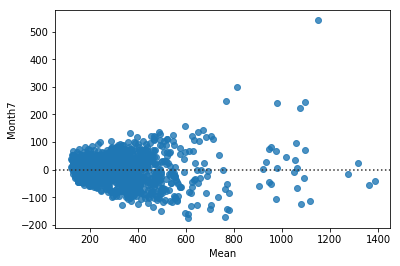

In [287]:
sns.residplot(monthly_crimes_avg_Mean,monthly_crimes_avg_Month7)

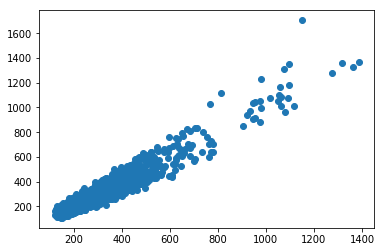

In [288]:
plt.scatter(monthly_crimes_avg_Mean,monthly_crimes_avg_Month7)

In [387]:
#Try GAM

In [290]:
#from pygam import LogisticGAM

In [289]:
#gam = LinearRegres().fit(X, y)

In [291]:
#Save the Monthly crimes details in csv

In [292]:
crimes.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1144606.0,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1
1,1,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,1166468.0,1860715.0,2015,41.773372,-87.665319,"(41.773371528, -87.665319468)",Mar,12,Wednesday,1
2,2,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1185075.0,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1
3,3,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,1178033.0,1870804.0,2015,41.800802,-87.622619,"(41.800802415, -87.622619343)",Mar,12,Wednesday,1
4,4,HY189976,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,1144920.0,1898709.0,2015,41.878065,-87.743354,"(41.878064761, -87.743354013)",Mar,12,Wednesday,1


In [293]:
monthly_crimes_2015 = crimes_2015.pivot_table(values = 'Case Number', index='Month', aggfunc=np.size)

In [294]:
monthly_crimes_2015

,Case Number
Month,
Apr,21669
Aug,24745
Dec,21093
Feb,16335
Jan,20806
Jul,24168
Jun,23117
Mar,21622
May,23633


In [295]:
crimes_2015.shape
total_2015 = monthly_crimes_2015['Case Number'].sum()

(263796, 23)

In [326]:
monthly_crimes_2015.to_csv("D:\\DataSets\\CrimeProject\\monthly_crimes_2015.csv")

In [297]:
monthly_crimes_2016 = crimes_2016.pivot_table(values = 'Case Number', index='Month', aggfunc=np.size)

In [298]:
crimes_2016.shape
total_2016 = monthly_crimes_2016['Case Number'].sum()

(268631, 23)

In [327]:
monthly_crimes_2016.to_csv("D:\\DataSets\\CrimeProject\\monthly_crimes_2016.csv")

In [300]:
monthly_crimes_2017 = crimes_2017.pivot_table(values = 'Case Number', index='Month', aggfunc=np.size)

In [301]:
crimes_2017.shape
total_2017 = monthly_crimes_2017['Case Number'].sum()

(267439, 23)

In [328]:
monthly_crimes_2017.to_csv("D:\\DataSets\\CrimeProject\\monthly_crimes_2017.csv")

### Classify wards as hotspots based on 3 months average

In [303]:
ward_monthly_crimes

Year_Month,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,1,244,230,262,259,278,278,289,330,352,...,325,315,296,346,377,361,347,374,300,297
1,2,551,438,606,646,653,680,762,706,707,...,667,672,747,797,809,832,762,728,705,637
2,3,314,280,328,394,403,396,417,411,402,...,365,374,410,446,413,430,381,411,394,335
3,4,260,152,260,214,307,274,347,276,324,...,283,294,308,345,378,315,310,321,301,301
4,5,313,220,335,365,355,352,379,382,384,...,320,299,363,349,422,375,338,327,380,356
5,6,392,292,473,484,523,501,489,513,531,...,429,468,495,499,504,513,479,466,462,459
6,7,368,263,334,376,428,394,465,446,355,...,345,366,371,386,429,412,431,347,342,342
7,8,310,300,407,409,437,420,404,417,378,...,349,399,410,371,402,384,411,391,327,334
8,9,315,218,347,377,401,346,408,393,370,...,342,427,417,424,416,353,384,358,338,333
9,10,248,171,240,223,276,306,283,295,262,...,231,245,287,256,289,271,271,265,209,232


In [304]:
ward_monthly_crimes_1 = ward_monthly_crimes.copy(deep = True)

In [305]:
ward_monthly_crimes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 37 columns):
Ward       50 non-null int64
2015-01    50 non-null int64
2015-02    50 non-null int64
2015-03    50 non-null int64
2015-04    50 non-null int64
2015-05    50 non-null int64
2015-06    50 non-null int64
2015-07    50 non-null int64
2015-08    50 non-null int64
2015-09    50 non-null int64
2015-10    50 non-null int64
2015-11    50 non-null int64
2015-12    50 non-null int64
2016-01    50 non-null int64
2016-02    50 non-null int64
2016-03    50 non-null int64
2016-04    50 non-null int64
2016-05    50 non-null int64
2016-06    50 non-null int64
2016-07    50 non-null int64
2016-08    50 non-null int64
2016-09    50 non-null int64
2016-10    50 non-null int64
2016-11    50 non-null int64
2016-12    50 non-null int64
2017-01    50 non-null int64
2017-02    50 non-null int64
2017-03    50 non-null int64
2017-04    50 non-null int64
2017-05    50 non-null int64
2017-06    50 non-null int6

In [306]:
ward_monthly_crimes_1.to_csv("D:\\DataSets\\CrimeProject\\ward_monthly_crimes_modified.csv")

In [307]:
#do the required 3 months calculation in the file and saveed in the file 'ward_monthly_crimes_modified_withAvg'

In [308]:
ward_monthly_crimes_2 = pd.read_csv("D:\\DataSets\\CrimeProject\\ward_monthly_crimes_modified_withAvg.csv")

In [309]:
ward_monthly_crimes_2.head()

,Unnamed: 0,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,Total_Last_3months,Avg_Last_3months
0,0,1,244,230,262,259,278,278,289,330,...,296,346,377,361,347,374,300,297,971,324
1,1,2,551,438,606,646,653,680,762,706,...,747,797,809,832,762,728,705,637,2070,690
2,2,3,314,280,328,394,403,396,417,411,...,410,446,413,430,381,411,394,335,1140,380
3,3,4,260,152,260,214,307,274,347,276,...,308,345,378,315,310,321,301,301,923,308
4,4,5,313,220,335,365,355,352,379,382,...,363,349,422,375,338,327,380,356,1063,354


In [310]:
#Take the sum of Avg_Last_3months column

In [311]:
Sum_of_Avg_Last_3months = ward_monthly_crimes_2['Avg_Last_3months'].sum()

In [312]:
Sum_of_Avg_Last_3months

14693

In [313]:
#Take the Average of Avg_Last_3months column

In [314]:
Avg_of_Avg_Last_3months = Sum_of_Avg_Last_3months/50

In [315]:
Avg_of_Avg_Last_3months

293.86

In [316]:
#If for any ward, Avg_Last_3months is greater than Avg_of_Avg_Last_3months, then mark it as 1, else 0

In [317]:
ward_monthly_crimes_2['abv_avg'] = np.where(ward_monthly_crimes_2['Avg_Last_3months'] >= Avg_of_Avg_Last_3months, 1, 0)

In [318]:
ward_monthly_crimes_2.head()

,Unnamed: 0,Ward,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,Total_Last_3months,Avg_Last_3months,abv_avg
0,0,1,244,230,262,259,278,278,289,330,...,346,377,361,347,374,300,297,971,324,1
1,1,2,551,438,606,646,653,680,762,706,...,797,809,832,762,728,705,637,2070,690,1
2,2,3,314,280,328,394,403,396,417,411,...,446,413,430,381,411,394,335,1140,380,1
3,3,4,260,152,260,214,307,274,347,276,...,345,378,315,310,321,301,301,923,308,1
4,4,5,313,220,335,365,355,352,379,382,...,349,422,375,338,327,380,356,1063,354,1


In [319]:
ward_monthly_crimes_3 = ward_monthly_crimes_2.copy(deep = True)

In [320]:
ward_monthly_crimes_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 41 columns):
Unnamed: 0            50 non-null int64
Ward                  50 non-null int64
2015-01               50 non-null int64
2015-02               50 non-null int64
2015-03               50 non-null int64
2015-04               50 non-null int64
2015-05               50 non-null int64
2015-06               50 non-null int64
2015-07               50 non-null int64
2015-08               50 non-null int64
2015-09               50 non-null int64
2015-10               50 non-null int64
2015-11               50 non-null int64
2015-12               50 non-null int64
2016-01               50 non-null int64
2016-02               50 non-null int64
2016-03               50 non-null int64
2016-04               50 non-null int64
2016-05               50 non-null int64
2016-06               50 non-null int64
2016-07               50 non-null int64
2016-08               50 non-null int64
2016-09          

In [323]:
#take the only required columns
ward_monthly_crimes_3 = ward_monthly_crimes_3[['Ward','Avg_Last_3months','abv_avg']]

In [324]:
ward_monthly_crimes_3.info()
ward_monthly_crimes_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Ward                50 non-null int64
Avg_Last_3months    50 non-null int64
abv_avg             50 non-null int32
dtypes: int32(1), int64(2)
memory usage: 1.1 KB


,Ward,Avg_Last_3months,abv_avg
0,1,324,1
1,2,690,1
2,3,380,1
3,4,308,1
4,5,354,1
5,6,462,1
6,7,344,1
7,8,351,1
8,9,343,1
9,10,235,0


# USE FB Prophet model for Time Series Forecasting

In [331]:
from fbprophet import Prophet

In [333]:
top_5_crimes.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter,Year_Month
0,0,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1,2015-03
2,2,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1,2015-03
3,3,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,1870804.0,2015,41.800802,-87.622619,"(41.800802415, -87.622619343)",Mar,12,Wednesday,1,2015-03
5,5,HY190032,2015-03-18 22:00:00,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,1872537.0,2015,41.805443,-87.604284,"(41.805443345, -87.604283976)",Mar,12,Wednesday,1,2015-03
6,6,HY190047,2015-03-18 23:00:00,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1858210.0,2015,41.766403,-87.649296,"(41.766402779, -87.649296123)",Mar,12,Wednesday,1,2015-03


In [334]:
top_5_crimes_upd = top_5_crimes.set_index('Date')

In [335]:
top_5_crimes_upd.head()

,Unnamed: 0,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,WeekNo,Weekday,Quarter,Year_Month
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,0,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,1903566.0,2015,41.891399,-87.744385,"(41.891398861, -87.744384567)",Mar,12,Wednesday,1,2015-03
2015-03-18 22:45:00,2,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,1875622.0,2015,41.813861,-87.596643,"(41.81386068, -87.596642837)",Mar,12,Wednesday,1,2015-03
2015-03-18 22:30:00,3,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,1870804.0,2015,41.800802,-87.622619,"(41.800802415, -87.622619343)",Mar,12,Wednesday,1,2015-03
2015-03-18 22:00:00,5,HY190032,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,False,False,223,...,1872537.0,2015,41.805443,-87.604284,"(41.805443345, -87.604283976)",Mar,12,Wednesday,1,2015-03
2015-03-18 23:00:00,6,HY190047,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,733,...,1858210.0,2015,41.766403,-87.649296,"(41.766402779, -87.649296123)",Mar,12,Wednesday,1,2015-03


In [336]:
top_5_crimes_monthly = top_5_crimes_upd.index.value_counts().resample('M',how='count')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


In [368]:
type(top_5_crimes_monthly)
top_5_crimes_monthly.head()

pandas.core.series.Series

2015-01-31    5761
2015-02-28    4763
2015-03-31    6115
2015-04-30    6270
2015-05-31    6807
Freq: M, Name: Date, dtype: int64

In [369]:
top_5_crimes_monthly_df = pd.Series.to_frame(top_5_crimes_monthly)

In [371]:
top_5_crimes_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2015-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
Date    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [372]:
top_5_crimes_monthly_df.head()

,Date
2015-01-31,5761
2015-02-28,4763
2015-03-31,6115
2015-04-30,6270
2015-05-31,6807


In [373]:
top_5_crimes_monthly_df['Month'] = top_5_crimes_monthly_df.index

In [374]:
#rename Date as Count
top_5_crimes_monthly_df = top_5_crimes_monthly_df.rename(columns = {"Date":"Count"})

In [375]:
top_5_crimes_monthly_df.head()

,Count,Month
2015-01-31,5761,2015-01-31
2015-02-28,4763,2015-02-28
2015-03-31,6115,2015-03-31
2015-04-30,6270,2015-04-30
2015-05-31,6807,2015-05-31


In [376]:
fd_df = top_5_crimes_monthly_df.copy(deep = True)

In [377]:
#rename the columns as per FB Prophet requirement
fd_df.columns = ['y','ds']

In [378]:
#fd_df=fd_df.sort_index(axis=1)

In [379]:
fd_df.head()

,y,ds
2015-01-31,5761,2015-01-31
2015-02-28,4763,2015-02-28
2015-03-31,6115,2015-03-31
2015-04-30,6270,2015-04-30
2015-05-31,6807,2015-05-31


In [380]:
#Build timeseries model

In [381]:
my_forecast = Prophet(interval_width=0.95)

In [382]:
my_forecast.fit(fd_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [383]:
forecast_periods = my_forecast.make_future_dataframe(periods=36, include_history=True, freq='M')
forecast_periods

,ds
0,2015-01-31
1,2015-02-28
2,2015-03-31
3,2015-04-30
4,2015-05-31
5,2015-06-30
6,2015-07-31
7,2015-08-31
8,2015-09-30
9,2015-10-31


In [384]:
forecast = my_forecast.predict(forecast_periods)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-31,6110.219816,5572.720807,5869.899780,6110.219816,6110.219816,-390.310441,-390.310441,-390.310441,-390.310441,-390.310441,-390.310441,0.0,0.0,0.0,5719.909375
1,2015-02-28,6148.770083,4688.367693,4996.568224,6148.770083,6148.770083,-1301.966961,-1301.966961,-1301.966961,-1301.966961,-1301.966961,-1301.966961,0.0,0.0,0.0,4846.803122
2,2015-03-31,6191.450735,5888.447453,6207.347607,6191.450735,6191.450735,-152.405890,-152.405890,-152.405890,-152.405890,-152.405890,-152.405890,0.0,0.0,0.0,6039.044845
3,2015-04-30,6232.754597,6089.807765,6400.757393,6232.754597,6232.754597,17.049244,17.049244,17.049244,17.049244,17.049244,17.049244,0.0,0.0,0.0,6249.803841
4,2015-05-31,6275.435253,6609.952130,6924.455564,6275.435253,6275.435253,495.978430,495.978430,495.978430,495.978430,495.978430,495.978430,0.0,0.0,0.0,6771.413683


In [385]:
forecast1 = forecast.loc[:,["ds", "yhat"]]

In [386]:
forecast1.head()

,ds,yhat
0,2015-01-31,5719.909375
1,2015-02-28,4846.803122
2,2015-03-31,6039.044845
3,2015-04-30,6249.803841
4,2015-05-31,6771.413683


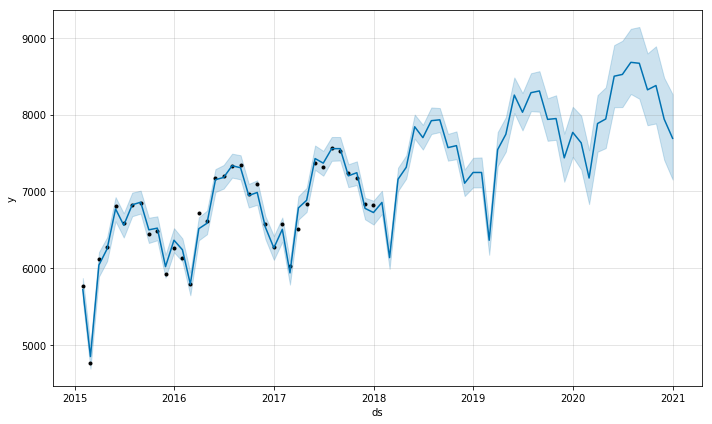

In [387]:
my_forecast.plot(forecast,uncertainty=True);

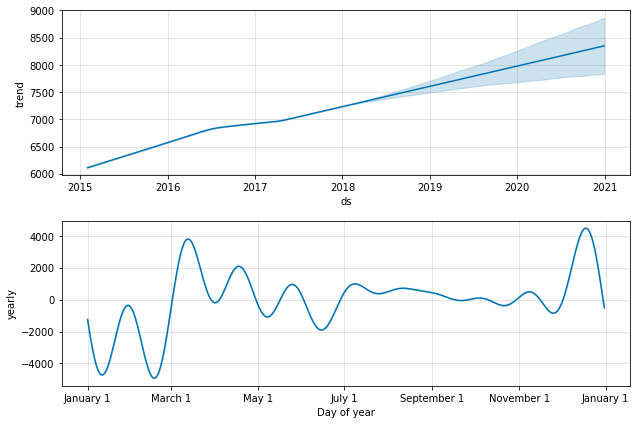

In [388]:
my_forecast.plot_components(forecast)
plt.show();

In [389]:
type(forecast1)

pandas.core.frame.DataFrame

In [390]:
final_df = pd.merge(forecast1, fd_df, on = 'ds', how='inner')

In [391]:
final_df.head()

,ds,yhat,y
0,2015-01-31,5719.909375,5761
1,2015-02-28,4846.803122,4763
2,2015-03-31,6039.044845,6115
3,2015-04-30,6249.803841,6270
4,2015-05-31,6771.413683,6807


In [392]:
#compute accuracy of the forecast

In [393]:
import numpy as np
from sklearn import metrics

In [394]:
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),2)

57.78